# Project 2
## Igor Balagula

## Dataset Description:

Dataset loaded from http://vlado.fmf.uni-lj.si/pub/networks/data./2mode/Sandi/Sandi.htm

Dataset size: 2-mode 674×314 network.

BACKGROUND These data were obtained from the bibliography of the book Imrich W, Klavžar S. (1999) Graph products. The result is a author-by-paper 2-mode network: arc (i,j) - author i is the (co)author of the paper j.

REFERENCES

Imrich W, Klavžar S. (1999). Graph products. References.

In [88]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from prettytable import PrettyTable
from scipy import stats
from networkx.algorithms import bipartite as bi

In [89]:
#code from the textbook
def trim_edges(g, weight=1):
    g2= nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2


def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

**Load full dataset and also extract Authors and Papers networks separately**

In [90]:
MG=nx.read_pajek("C:\\temp\\sandi_data.net")
G=nx.Graph(MG)

MG_authors=nx.read_pajek("C:\\temp\\sandi_data_authors.net")
G_authors=nx.Graph(MG_authors)

MG_papers=nx.read_pajek("C:\\temp\\sandi_data_papers_1.net")
G_papers=nx.Graph(MG_papers)

In [91]:
authors.edges()[0:5]

[(u'Hedetniemi, S.T. ', u'Wimer, T.V.'),
 (u'Hedetniemi, S.T. ', u'Hare, E.O. '),
 (u'Hedetniemi, S.T. ', u'Cockayne, E.J. '),
 (u'Hedetniemi, S.T. ', u'Laskar, R.C. '),
 (u'Hedetniemi, S.T. ', u'Domke, G.S.')]

In [92]:
papers.edges()[0:5]

[(u'grkh-95', u'grav-97'),
 (u'grkh-95', u'grmo-97'),
 (u'hara-97', u'brno-96'),
 (u'hara-97', u'hara-95'),
 (u'hara-97', u'nora-96')]

In [93]:
print("The number of nodes in full 2-mode collaboration network: %d" % G.number_of_nodes())
print("Density: %s" % nx.density(G))

The number of nodes in full 2-mode collaboration network: 674
Density: 0.00270280995234


**Generate weighted bipartite graphs**

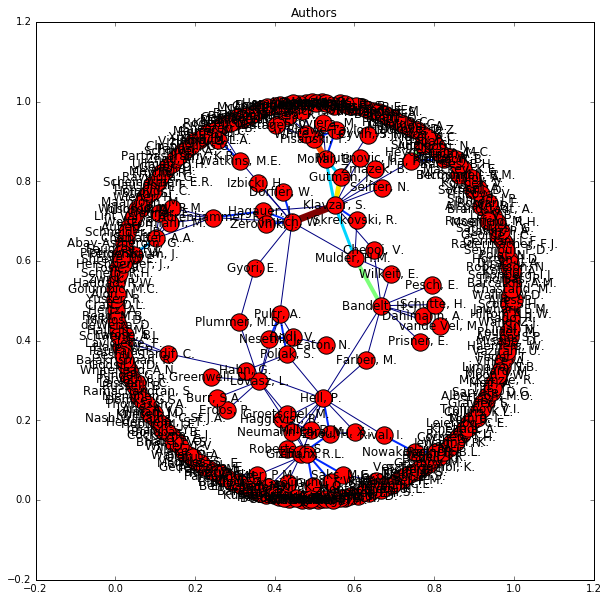

In [94]:
authors = bi.weighted_projected_graph(G,G_authors.nodes())
weights = [edata['weight'] for f,t,edata in authors.edges(data=True)]
plt.figure(figsize=(10,10))
nx.draw_networkx(authors, width=weights, edge_color=weights)
plt.title('Authors')
plt.show()

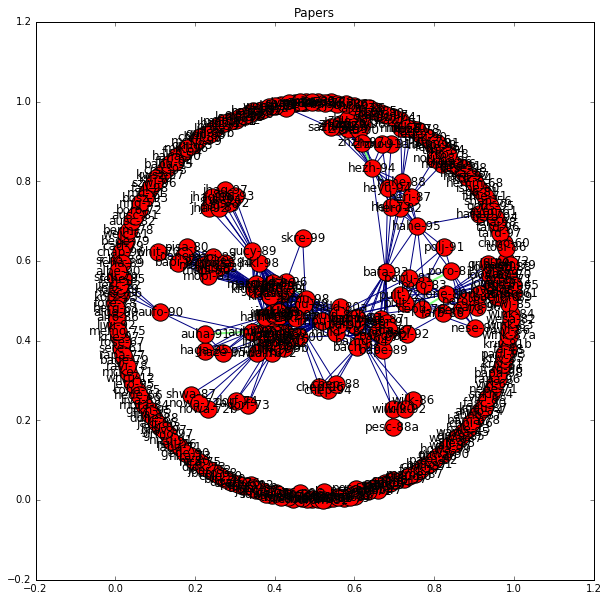

In [95]:
papers = bi.weighted_projected_graph(G,G_papers.nodes())
weights = [edata['weight'] for f,t,edata in papers.edges(data=True)]
plt.figure(figsize=(10,10))
nx.draw_networkx(papers, width=weights, edge_color=weights)
plt.title('Papers')
plt.show()

In [96]:
print("The number of nodes in authors network: %d" % authors.number_of_nodes())
print("Density: %s" % nx.density(authors))

The number of nodes in authors network: 314
Density: 0.0053315968336


In [97]:
print("The number of nodes in papers network: %d" % papers.number_of_nodes())
print("Density: %s" % nx.density(authors))

The number of nodes in papers network: 360
Density: 0.0053315968336


**Isolate subgraphs with island method**

In [98]:
islands = island_method(authors)
for i in islands:
    print i[0], len(i[1])

1 55
2 17
3 9
4 5
5 4
6 2


**Graph subgraphs at different levels**

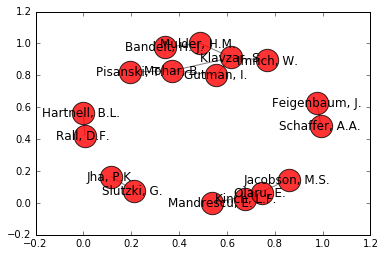

In [99]:
authors_t2 = trim_edges(authors, 2)
pos=nx.spring_layout(authors_t2)
nx.draw_networkx_nodes(authors_t2,pos,node_size=500,alpha=0.8)
nx.draw_networkx_edges(authors_t2,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(authors_t2,pos)
plt.show()

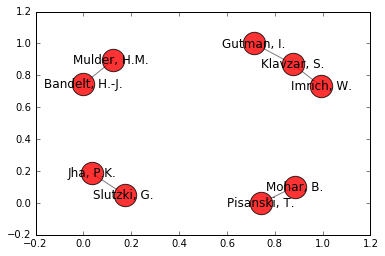

In [100]:
authors_t3 = trim_edges(authors, 3)
pos=nx.spring_layout(authors_t3)
nx.draw_networkx_nodes(authors_t3,pos,node_size=500,alpha=0.8)
nx.draw_networkx_edges(authors_t3,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(authors_t3,pos)
plt.show()

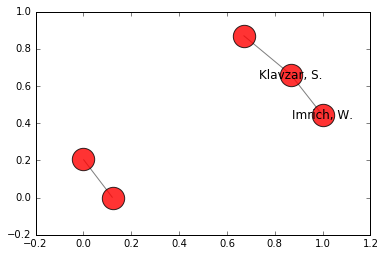

In [101]:
authors_t4 = trim_edges(authors, 4)
pos=nx.spring_layout(authors_t4)
nx.draw_networkx_nodes(authors_t4,pos,node_size=500,alpha=0.8)
nx.draw_networkx_edges(authors_t4,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(authors_t6,pos)
plt.show()

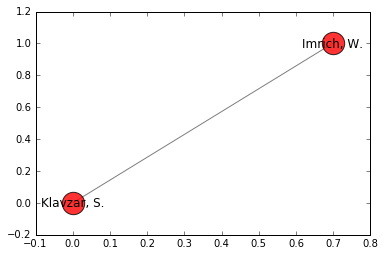

In [102]:
authors_t6 = trim_edges(authors, 6)
pos=nx.spring_layout(authors_t6)
nx.draw_networkx_nodes(authors_t6,pos,node_size=500,alpha=0.8)
nx.draw_networkx_edges(authors_t6,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(authors_t6,pos)
plt.show()

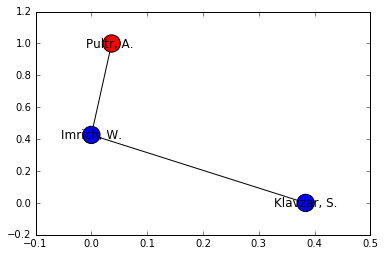

In [103]:
sub_centers = ['Imrich, W.', 'Klavzar, S.']
sub = nx.Graph([(k,v) for k,v in authors.edges() if k in sub_centers])
node_colors = ['b' if n in sub_centers else 'r' for n in sub.nodes()]
pos = nx.spring_layout(sub)
nx.draw_networkx(sub, node_color=node_colors,with_labels=True)
plt.show()

In [104]:
sub.number_of_nodes()

3

I am getting errors trying to apply the island method to "papers" network and am unable to figure our the issue in the remaming time before the deadline.